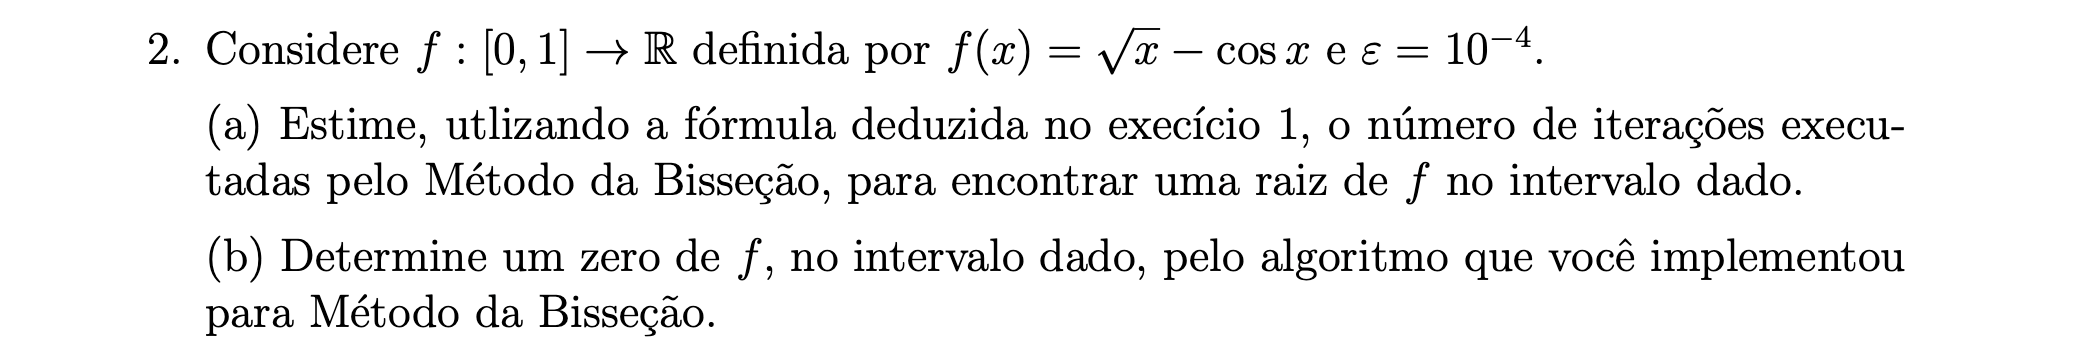

a)

Teorema da converência do método da bisseção:

$|x^{(k)} - x^*| < \dfrac{b - a}{2^{k+1}}, \forall n \geq 0$

$\epsilon < \dfrac{b - a}{2^{k+1}} $

$\dfrac{b - a}{2^{k+1}} \gt \epsilon$

$\dfrac{b - a}{2^{k} \cdot 2^1} \gt \epsilon$

$\dfrac{2^{-k}(b - a)}{2} \gt \epsilon$

$2^{-k}(b - a) \gt 2 \epsilon$

$2^{-k}\gt \dfrac{2 \epsilon}{(b - a)}$

$-k\gt \log_2 \left( \dfrac{2 \epsilon}{(b - a)} \right) $

$k\gt -\log_2 \left( \dfrac{2 \epsilon}{(b - a)} \right) $

$k\gt -\log_2 \left( \dfrac{2 \cdot 10^-4}{(1 - 0)} \right) $

$k\gt -\log_2 \left( 2 \cdot 10^-4 \right)$

$k\gt -\log_2 \left( 2 \cdot 10^-4 \right)$

$k > 12.29$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def estimar_k(a, b, e):
    est = -np.log2((2*e) / (b - a))
    return print(f'k >= {est}')

a = 0
b = 1
e = 10**(-4)

estimar_k(a,b,e)

k >= 12.287712379549449


In [3]:
def bissecao(F_OBJ, a, b, TOL, K_MAX=100):

    def tem_raiz(a,b):
        return F_OBJ(a)*F_OBJ(b) < 0
b
    def atende_criterio_parada(a,b):
        return np.abs(b-a) <= TOL

    def estimar_x(a,b):
        return (a+b)/2

    if not tem_raiz(a,b):
        print("O intervalo escolhido não possui uma raíz")
        return None
    if atende_criterio_parada(a,b):
        print("O intervalo inicial já possui a precisão especificada")
        return None
    k = 0
    while k < K_MAX:
        k += 1

        # Calcula o ponto medio:
        x_0 = estimar_x(a,b)

        # Define o lado:
        if tem_raiz(a,x_0):
            b = x_0
        else:
            a = x_0

        # Checa o critério de parada:
        if atende_criterio_parada(a,b):
            return {'num_iter': k, 'x_est': x_0}

    print("Número máximo de iterações atingido")

In [4]:
def f(x): return np.sqrt(x) - np.cos(x)

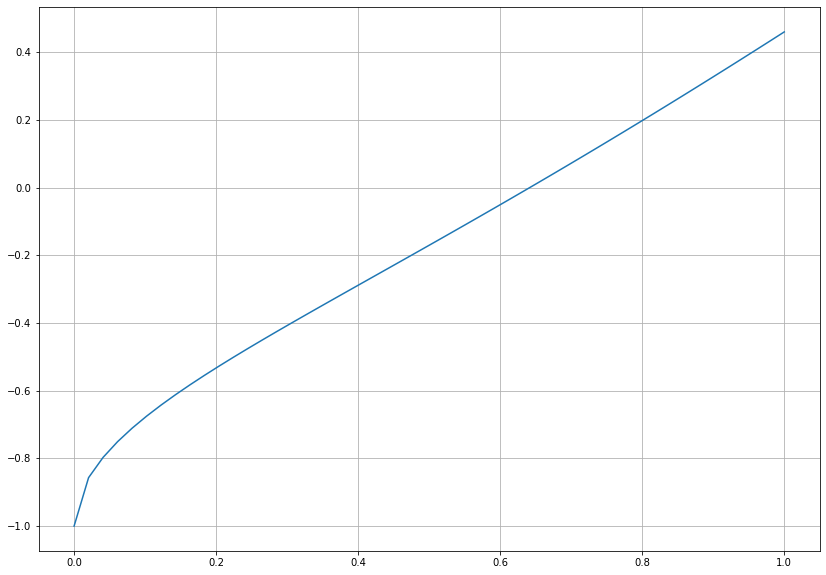

In [5]:
plt.figure(figsize=(14,10))
xx = np.linspace(0,1)
plt.plot(xx,f(xx))
plt.grid(); plt.show()

In [6]:
bissecao(F_OBJ=f, a=a, b=b, TOL=e)

{'num_iter': 14, 'x_est': 0.64166259765625}

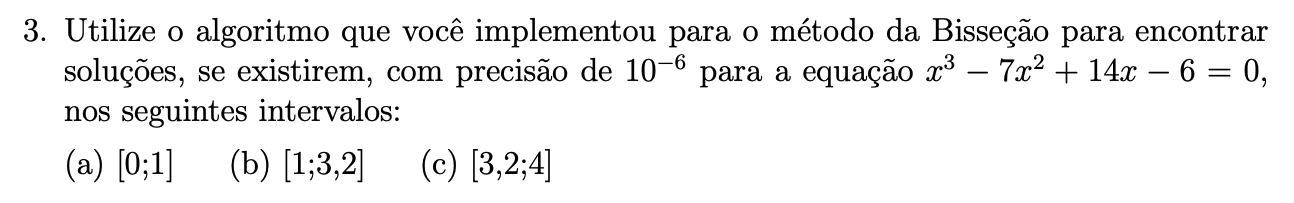

In [7]:
def f(x): return x**3 - 7*x**2 + 14*x - 6
e = 10**(-6)

In [8]:
# a)

a = 0
b = 1

estimar_k(a,b,e)

k >= 18.931568569324174


In [9]:
bissecao(F_OBJ=f, a=a, b=b, TOL=e)

{'num_iter': 20, 'x_est': 0.5857858657836914}

In [10]:
# b)

a = 1
b = 3.2

estimar_k(a,b,e)

k >= 20.06907209307411


In [11]:
bissecao(F_OBJ=f, a=a, b=b, TOL=e)

{'num_iter': 22, 'x_est': 2.9999996662139896}

In [12]:
# c)

a = 3.2
b = 4

estimar_k(a,b,e)

k >= 18.609640474436812


In [13]:
bissecao(F_OBJ=f, a=a, b=b, TOL=e)

{'num_iter': 20, 'x_est': 3.414214324951172}

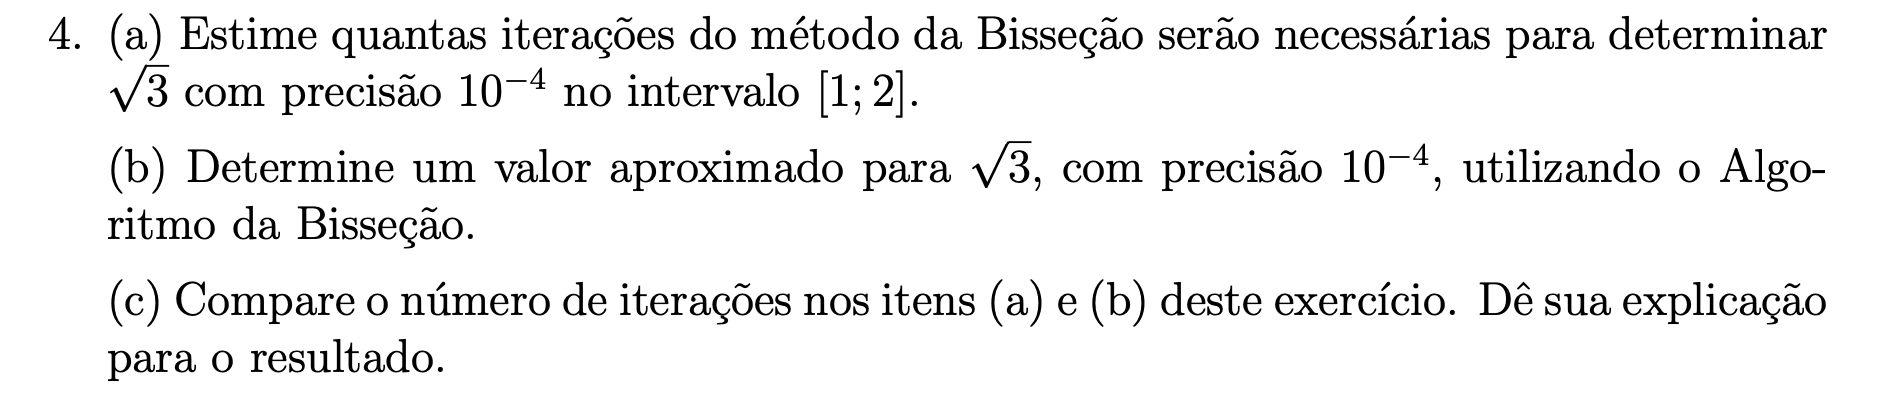

a)

$a = 1$

$b = 2$

$\epsilon = 10^{-4}$

$k\gt -\log_2 \left( \dfrac{2 \epsilon}{(b - a)} \right) $

In [14]:
estimar_k(1,2,10**(-4))

k >= 12.287712379549449


<hr>

b)

$\sqrt{3} = x$

$3 = x^2$

$x^2 - 3 = 0$

$f(x) = x^2 - 3$

In [15]:
# b)

def f(x): return x**2 - 3

a = 1
b = 2
e = 10**(-4)

In [16]:
bissecao(F_OBJ=f, a=a, b=b, TOL=e)

{'num_iter': 14, 'x_est': 1.73199462890625}

In [17]:
np.sqrt(3)

1.7320508075688772

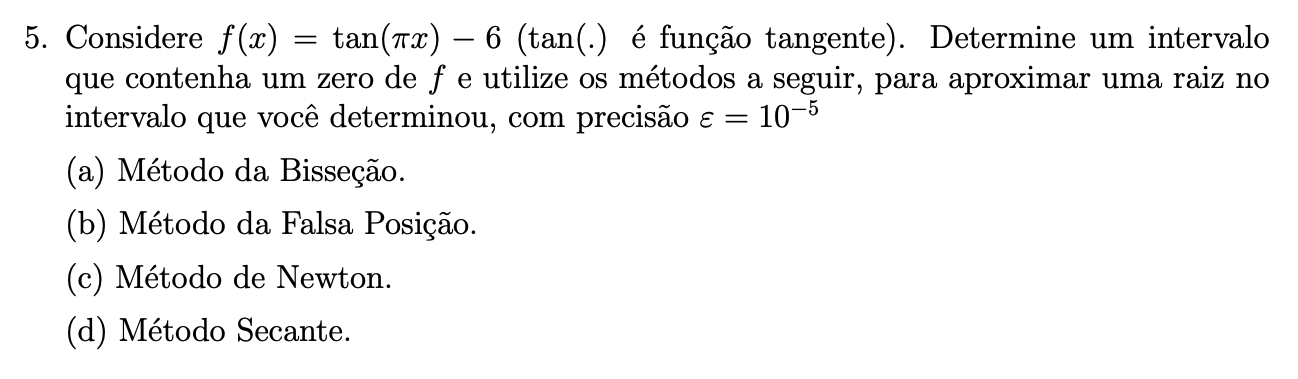

In [18]:
def falsa_posicao(F_OBJ, a, b, TOL, K_MAX=100):

    def tem_raiz(a,b):
        return F_OBJ(a)*F_OBJ(b) < 0

    def atende_criterio_parada(a,b):
        return np.abs(b-a) <= TOL

    def estimar_x(a,b):
        return (a*F_OBJ(b) - b*F_OBJ(a)) / (F_OBJ(b) - F_OBJ(a))
    
    def e_raiz_estimada(x):
        return np.abs(F_OBJ(x)) < TOL

    if not tem_raiz(a,b):
        print("O intervalo escolhido não possui uma raíz")
        return None
    if atende_criterio_parada(a,b):
        print("O intervalo inicial já possui a precisão especificada")
        return None
    if e_raiz_estimada(a):
        print('f(a) é menor que a precisão especificada')
        return
    if e_raiz_estimada(b):
        print('f(b) é menor que a precisão especificada')
        return
    k = 0
    while k < K_MAX:
        k += 1

        # Calcula o ponto medio:
        x_0 = estimar_x(a,b)
        
        if e_raiz_estimada(x_0):
            return {'num_iter': k, 'x_est': x_0}

        # Define o lado:
        if tem_raiz(a,x_0):
            b = x_0
        else:
            a = x_0

        # Checa o critério de parada:
        if atende_criterio_parada(a,b):
            return {'num_iter': k, 'x_est': x_0}

    print("Número máximo de iterações atingido")
    
    
    
    
def newton(F_OBJ, F_PRIME, X_INI, TOL, K_MAX=100):
    x_last = X_INI
    k = 0
    
    while k < K_MAX:
        k += 1
        x_0 = x_last - F_OBJ(x_last) / F_PRIME(x_last)
        if np.abs(x_0 - x_last) < TOL:
            return {'num_iter': k, 'x_est': x_0}
        x_last = x_0
    print("Número máximo de iterações atingido")
    
    

def secante(F_OBJ, X_INI, X_INI_2, TOL, K_MAX=100):
    x_temp = X_INI_2
    x_last = X_INI
    k = 0
    
    while k < K_MAX:
        k += 1
        x_0 = x_last - F_OBJ(x_last) * ((x_last - x_temp) / (F_OBJ(x_last) - F_OBJ(x_temp)))
        if np.abs(x_0 - x_last) < TOL:
            return {'num_iter': k, 'x_est': x_0}
        x_temp = x_last
        x_last = x_0
    print("Número máximo de iterações atingido")

(-1.0, 1.0)

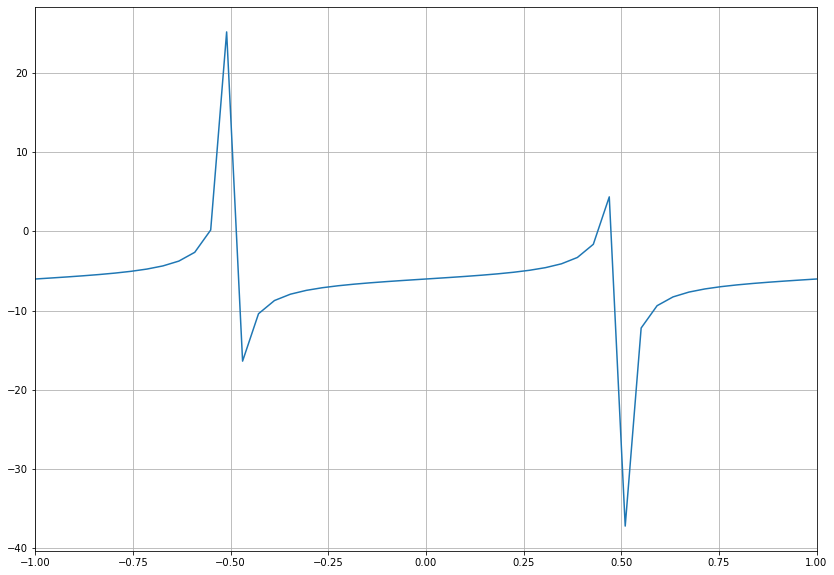

In [19]:
def f(x): return np.tan(np.pi*x) - 6
plt.figure(figsize=(14,10))
xx = np.linspace(-1,1)
plt.plot(xx,f(xx))
plt.grid()
plt.xlim([-1,1])

In [20]:
def f(x): return np.tan(np.pi*x) - 6
e = 10**(-5)
a = 0.42
b = 0.48

In [21]:
# a) Bisseção:

bissecao(F_OBJ=f, a=a, b=b, TOL=e)

{'num_iter': 13, 'x_est': 0.44742919921874996}

In [22]:
# b) Falsa posição:

falsa_posicao(F_OBJ=f, a=a, b=b, TOL=e)

{'num_iter': 27, 'x_est': 0.44743148284581014}

In [23]:
# c) Newton-Raphson

def f_prime(x): return np.pi * (1 / np.cos(np.pi * x))**2

newton(F_OBJ=f, F_PRIME=f_prime, X_INI=a, TOL=e)

{'num_iter': 5, 'x_est': 0.44743154331973345}

In [24]:
# d) Secante:

secante(F_OBJ=f, X_INI=a, X_INI_2=b, TOL=e)

{'num_iter': 7, 'x_est': 0.4474315432010906}